# Team Project 1  
**Authors:** Aaron Bone and Molly Rovinski  
**Version:** 1.0
**Semester:** Spring 2021  

**Goal:** Apply the exploratory analysis techniques you have learned this semester to prepare a dataset and implement a machine learning (ML) model. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Part 1: Exploratory Data Analysis

Read in Chess data file.

In [7]:
p = pd.read_csv("Chess.csv")

In [8]:
p.head(5)

,GAME,BlackElo,BlackRatingDiff,Date,ECO,Event,Opening,Result,Site,Termination,...,Black_ts_blunders,White_ts_blunders,Black_ts_mistakes,White_ts_mistake,Black_long_moves,White_long_moves,Black_bad_long_moves,White_bad_long_moves,Game_flips,Game_flips_ts
0,11,1143,6.0,2020.09.01,A02,Rated Blitz game,Bird Opening,0-1,https://lichess.org/hjb8FYm1,Time forfeit,...,0,0,0,0,2,1,1,1,8,0
1,14,1504,NaN,2020.09.01,A04,Rated Blitz game,Réti Opening,0-1,https://lichess.org/Iz2fbHuE,Normal,...,0,0,0,0,0,1,0,0,6,0
2,29,1933,1.0,2020.09.01,C41,Rated Blitz game,Philidor Defense,0-1,https://lichess.org/Cdj7flmY,Time forfeit,...,0,0,0,0,1,1,1,0,5,0
3,40,1710,10.0,2020.09.01,B23,Rated Blitz game,Sicilian Defense: Closed,0-1,https://lichess.org/WZQ9FEpD,Normal,...,4,0,0,0,3,1,1,0,8,1
4,55,1598,-1.0,2020.09.01,B03,Rated Rapid game,Alekhine Defense,Jan-00,https://lichess.org/ESlJl57U,Normal,...,0,0,0,0,0,0,0,0,2,0


Drop columns that do not correlate with each other due to specificity of each game. 

In [88]:
Chess = p.drop(columns = ['Result', 'Site', 'Event', 'Opening'])

In [69]:
Chess.columns

Index(['GAME', 'BlackElo', 'BlackRatingDiff', 'Date', 'ECO', 'Opening',
       'Termination', 'TimeControl', 'UTCTime', 'WhiteElo', 'WhiteRatingDiff',
       'Black_elo_category', 'White_elo_category', 'starting_time',
       'increment', 'Game_type', 'Total_moves', 'Black_blunders',
       'White_blunders', 'Black_mistakes', 'White_mistakes',
       'Black_inaccuracies', 'White_inaccuracies', 'Black_inferior_moves',
       'White_inferior_moves', 'Black_ts_moves', 'White_ts_moves',
       'Black_ts_blunders', 'White_ts_blunders', 'Black_ts_mistakes',
       'White_ts_mistake', 'Black_long_moves', 'White_long_moves',
       'Black_bad_long_moves', 'White_bad_long_moves', 'Game_flips',
       'Game_flips_ts'],
      dtype='object')

Gather date type for each variable. 

In [70]:
Chess.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 37 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   GAME                  1048575 non-null  int64  
 1   BlackElo              1048575 non-null  int64  
 2   BlackRatingDiff       1044693 non-null  float64
 3   Date                  1048575 non-null  object 
 4   ECO                   1048575 non-null  object 
 5   Opening               1048575 non-null  object 
 6   Termination           1048575 non-null  object 
 7   TimeControl           1048575 non-null  object 
 8   UTCTime               1048575 non-null  object 
 9   WhiteElo              1048575 non-null  int64  
 10  WhiteRatingDiff       1044693 non-null  float64
 11  Black_elo_category    1048575 non-null  object 
 12  White_elo_category    1048575 non-null  object 
 13  starting_time         1044911 non-null  float64
 14  increment             1044911 non-

In [71]:
pd.set_option('display.max_columns', None)

In [72]:
pd.set_option('display.max_rows', None)

Find missing data for each variable. 

In [73]:
Chess.isna().mean().round(4)*100

GAME                    0.00
BlackElo                0.00
BlackRatingDiff         0.37
Date                    0.00
ECO                     0.00
Opening                 0.00
Termination             0.00
TimeControl             0.00
UTCTime                 0.00
WhiteElo                0.00
WhiteRatingDiff         0.37
Black_elo_category      0.00
White_elo_category      0.00
starting_time           0.35
increment               0.35
Game_type               0.00
Total_moves             0.00
Black_blunders          0.00
White_blunders          0.00
Black_mistakes          0.00
White_mistakes          0.00
Black_inaccuracies      0.00
White_inaccuracies      0.00
Black_inferior_moves    0.00
White_inferior_moves    0.00
Black_ts_moves          0.00
White_ts_moves          0.00
Black_ts_blunders       0.00
White_ts_blunders       0.00
Black_ts_mistakes       0.00
White_ts_mistake        0.00
Black_long_moves        0.00
White_long_moves        0.00
Black_bad_long_moves    0.00
White_bad_long

In [74]:
Chess.head()

,GAME,BlackElo,BlackRatingDiff,Date,ECO,Opening,Termination,TimeControl,UTCTime,WhiteElo,WhiteRatingDiff,Black_elo_category,White_elo_category,starting_time,increment,Game_type,Total_moves,Black_blunders,White_blunders,Black_mistakes,White_mistakes,Black_inaccuracies,White_inaccuracies,Black_inferior_moves,White_inferior_moves,Black_ts_moves,White_ts_moves,Black_ts_blunders,White_ts_blunders,Black_ts_mistakes,White_ts_mistake,Black_long_moves,White_long_moves,Black_bad_long_moves,White_bad_long_moves,Game_flips,Game_flips_ts
0,11,1143,6.0,2020.09.01,A02,Bird Opening,Time forfeit,300+0,0:00:00,1180,-7.0,Low rating,Low rating,300.0,0.0,Blitz,66,4,2,0,3,3,1,7,6,8,8,0,0,0,0,2,1,1,1,8,0
1,14,1504,NaN,2020.09.01,A04,Réti Opening,Normal,300+0,0:00:00,1381,NaN,Low rating,Low rating,300.0,0.0,Blitz,64,2,1,1,1,7,5,10,7,0,0,0,0,0,0,0,1,0,0,6,0
2,29,1933,1.0,2020.09.01,C41,Philidor Defense,Time forfeit,300+2,0:00:00,1485,-1.0,High rating,Low rating,300.0,2.0,Blitz,70,0,1,1,2,8,8,9,11,0,2,0,0,0,0,1,1,1,0,5,0
3,40,1710,10.0,2020.09.01,B23,Sicilian Defense: Closed,Normal,180+2,0:00:00,2040,-11.0,Low rating,High rating,180.0,2.0,Blitz,86,4,2,1,5,3,4,8,11,18,0,4,0,0,0,3,1,1,0,8,1
4,55,1598,-1.0,2020.09.01,B03,Alekhine Defense,Normal,600+0,0:00:00,2163,0.0,Low rating,High rating,600.0,0.0,Rapid,71,1,0,1,1,6,2,8,3,0,0,0,0,0,0,0,0,0,0,2,0


In [75]:
Chess.tail()

,GAME,BlackElo,BlackRatingDiff,Date,ECO,Opening,Termination,TimeControl,UTCTime,WhiteElo,WhiteRatingDiff,Black_elo_category,White_elo_category,starting_time,increment,Game_type,Total_moves,Black_blunders,White_blunders,Black_mistakes,White_mistakes,Black_inaccuracies,White_inaccuracies,Black_inferior_moves,White_inferior_moves,Black_ts_moves,White_ts_moves,Black_ts_blunders,White_ts_blunders,Black_ts_mistakes,White_ts_mistake,Black_long_moves,White_long_moves,Black_bad_long_moves,White_bad_long_moves,Game_flips,Game_flips_ts
1048570,117098,1683,7.0,2020.09.09,B98,Sicilian Defense: Najdorf Variation,Normal,300+3,7:16:33,1733,-6.0,Low rating,Low rating,300.0,3.0,Blitz,88,1,2,5,7,0,1,6,10,0,4,0,1,0,0,1,2,1,2,10,0
1048571,117122,2105,6.0,2020.09.09,B80,"Sicilian Defense: Scheveningen Variation, Engl...",Time forfeit,180+0,7:16:35,2112,-6.0,High rating,High rating,180.0,0.0,Blitz,134,0,2,6,5,5,5,11,12,2,23,0,0,0,1,0,2,0,0,14,0
1048572,117134,1172,6.0,2020.09.09,D00,Queen's Pawn Game: Mason Attack,Time forfeit,60+0,7:16:35,1234,-10.0,Low rating,Low rating,60.0,0.0,Bullet,62,7,8,0,0,2,3,9,11,0,7,0,0,0,0,0,1,0,1,12,0
1048573,117143,1901,17.0,2020.09.09,A00,Mieses Opening,Normal,60+0,7:16:35,1917,-6.0,High rating,High rating,60.0,0.0,Bullet,40,1,1,0,1,2,2,3,4,0,0,0,0,0,0,0,0,0,0,2,0
1048574,117161,1816,-5.0,2020.09.09,C46,Three Knights Opening,Normal,600+0,7:16:36,1822,67.0,Low rating,Low rating,600.0,0.0,Rapid,49,5,6,2,0,5,4,12,10,0,0,0,0,0,0,0,0,0,0,9,0


In [76]:
Chess.columns

Index(['GAME', 'BlackElo', 'BlackRatingDiff', 'Date', 'ECO', 'Opening',
       'Termination', 'TimeControl', 'UTCTime', 'WhiteElo', 'WhiteRatingDiff',
       'Black_elo_category', 'White_elo_category', 'starting_time',
       'increment', 'Game_type', 'Total_moves', 'Black_blunders',
       'White_blunders', 'Black_mistakes', 'White_mistakes',
       'Black_inaccuracies', 'White_inaccuracies', 'Black_inferior_moves',
       'White_inferior_moves', 'Black_ts_moves', 'White_ts_moves',
       'Black_ts_blunders', 'White_ts_blunders', 'Black_ts_mistakes',
       'White_ts_mistake', 'Black_long_moves', 'White_long_moves',
       'Black_bad_long_moves', 'White_bad_long_moves', 'Game_flips',
       'Game_flips_ts'],
      dtype='object')

Get data summary for Chess dataset. 

In [77]:
Chess.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
GAME,1048575.0,82960.89,48028.82,1.0,41421.0,82753.0,124454.0,166631.0
BlackElo,1048575.0,1601.47,342.52,600.0,1353.0,1591.0,1840.0,3104.0
BlackRatingDiff,1044693.0,3.79,31.47,-675.0,-6.0,-1.0,6.0,856.0
WhiteElo,1048575.0,1600.67,342.50,600.0,1353.0,1590.0,1839.0,3101.0
WhiteRatingDiff,1044693.0,4.56,33.28,-610.0,-6.0,1.0,7.0,729.0
starting_time,1044911.0,375.59,407.25,0.0,180.0,300.0,600.0,10800.0
increment,1044911.0,1.69,4.23,0.0,0.0,0.0,2.0,180.0
Total_moves,1048575.0,64.06,26.92,1.0,46.0,59.0,77.0,336.0
Black_blunders,1048575.0,2.04,1.95,0.0,1.0,2.0,3.0,28.0
White_blunders,1048575.0,2.02,1.97,0.0,1.0,2.0,3.0,29.0


Find frequencies for each categorical variable. 

In [80]:
Chess.Termination.value_counts()

Normal              804674
Time forfeit        243776
Rules infraction       105
Abandoned               20
Name: Termination, dtype: int64

In [81]:
Chess.Termination.value_counts()/len(Chess)

Normal              0.767398
Time forfeit        0.232483
Rules infraction    0.000100
Abandoned           0.000019
Name: Termination, dtype: float64

In [82]:
Chess.Black_elo_category.value_counts()

Low rating     839642
High rating    197740
GM rating       11193
Name: Black_elo_category, dtype: int64

In [83]:
Chess.Black_elo_category.value_counts()/len(Chess)

Low rating     0.800746
High rating    0.188580
GM rating      0.010674
Name: Black_elo_category, dtype: float64

In [84]:
Chess.White_elo_category.value_counts()

Low rating     840351
High rating    197120
GM rating       11104
Name: White_elo_category, dtype: int64

In [85]:
Chess.White_elo_category.value_counts()/len(Chess)

Low rating     0.801422
High rating    0.187988
GM rating      0.010590
Name: White_elo_category, dtype: float64

In [86]:
Chess.Game_type.value_counts()

Blitz             501025
Rapid             274240
Bullet            228742
Classical          40904
Correspondence      3664
Name: Game_type, dtype: int64

In [87]:
Chess.Game_type.value_counts()/len(Chess)

Blitz             0.477815
Rapid             0.261536
Bullet            0.218146
Classical         0.039009
Correspondence    0.003494
Name: Game_type, dtype: float64

In [89]:
Chess.ECO.value_counts()

A00    50398
D00    46755
B01    42585
A40    42089
C00    36696
B00    28103
C50    27996
C20    24177
C41    24130
C42    23874
B20    23397
D02    22492
A45    19601
B07    16422
B06    16277
C40    15784
C44    15522
A04    15492
C46    15208
B10    14582
B30    14249
C55    13857
B21    13658
C45    12649
C02    11670
B12    10423
D06     9903
A01     9692
D20     9692
B50     9511
B40     8603
A43     8600
B23     8599
C01     8123
C23     7601
A06     7510
B32     7502
B02     7472
C21     7179
A10     6705
D10     6682
D30     6415
A41     6364
B22     5797
C57     5555
C30     5463
A46     5425
C53     5068
D01     5059
C62     4905
B13     4823
C24     4792
A20     4761
C34     4719
C65     4398
D35     4304
D31     4303
B90     4140
A02     4049
A03     3811
C48     3799
C47     3751
C60     3725
C26     3501
A21     3455
C22     3413
B33     3362
C25     3353
B27     3327
A13     3185
E61     3146
B25     3127
A80     3037
C27     3029
C64     2998
A22     2979
B54     2886

In [90]:
Chess.ECO.value_counts()/len(Chess)

A00    4.806332e-02
D00    4.458909e-02
B01    4.061226e-02
A40    4.013924e-02
C00    3.499607e-02
B00    2.680113e-02
C50    2.669909e-02
C20    2.305701e-02
C41    2.301218e-02
C42    2.276804e-02
B20    2.231314e-02
D02    2.145006e-02
A45    1.869299e-02
B07    1.566125e-02
B06    1.552297e-02
C40    1.505281e-02
C44    1.480295e-02
A04    1.477434e-02
C46    1.450349e-02
B10    1.390649e-02
B30    1.358892e-02
C55    1.321508e-02
B21    1.302530e-02
C45    1.206304e-02
C02    1.112939e-02
B12    9.940157e-03
D06    9.444246e-03
A01    9.243020e-03
D20    9.243020e-03
B50    9.070405e-03
B40    8.204468e-03
A43    8.201607e-03
B23    8.200653e-03
C01    7.746704e-03
C23    7.248885e-03
A06    7.162101e-03
B32    7.154472e-03
B02    7.125861e-03
C21    6.846434e-03
A10    6.394392e-03
D10    6.372458e-03
D30    6.117827e-03
A41    6.069189e-03
B22    5.528455e-03
C57    5.297666e-03
C30    5.209928e-03
A46    5.173688e-03
C53    4.833226e-03
D01    4.824643e-03
C62    4.677777e-03


Create correlation matrix and heatmap.

In [94]:
Chess.corr()

,GAME,BlackElo,BlackRatingDiff,WhiteElo,WhiteRatingDiff,starting_time,increment,Total_moves,Black_blunders,White_blunders,Black_mistakes,White_mistakes,Black_inaccuracies,White_inaccuracies,Black_inferior_moves,White_inferior_moves,Black_ts_moves,White_ts_moves,Black_ts_blunders,White_ts_blunders,Black_ts_mistakes,White_ts_mistake,Black_long_moves,White_long_moves,Black_bad_long_moves,White_bad_long_moves,Game_flips,Game_flips_ts
GAME,1.000000,0.001872,0.000267,0.000851,-0.000624,0.001922,0.001911,0.002052,-0.000719,-0.000906,0.000895,0.000228,0.000696,0.000326,0.000484,-0.000132,0.001334,-0.000352,0.001117,-0.000298,0.000895,0.000808,-0.001092,0.000295,-0.001020,-0.000166,0.000090,0.001246
BlackElo,0.001872,1.000000,-0.036579,0.909717,-0.000449,0.005934,-0.007768,0.195585,-0.193748,-0.177882,-0.016344,0.005459,0.073864,0.081626,-0.061256,-0.038667,0.085524,0.089916,0.023915,0.029354,0.058353,0.064130,0.046267,0.066170,0.012465,0.027177,-0.065383,0.047912
BlackRatingDiff,0.000267,-0.036579,1.000000,-0.000614,-0.311927,0.015966,-0.000371,-0.005409,-0.101806,0.101529,-0.047531,0.057669,-0.060320,0.060505,-0.099681,0.104331,-0.056785,0.022122,-0.060531,0.043367,-0.044641,0.029528,-0.059833,0.043570,-0.058573,0.044513,0.004507,-0.009559
WhiteElo,0.000851,0.909717,-0.000614,1.000000,-0.036805,0.005081,-0.007451,0.191951,-0.174708,-0.196067,-0.000058,-0.009647,0.087431,0.060861,-0.037582,-0.064504,0.090539,0.083875,0.028998,0.024025,0.062623,0.058678,0.069942,0.041790,0.030110,0.008800,-0.065976,0.047414
WhiteRatingDiff,-0.000624,-0.000449,-0.311927,-0.036805,1.000000,0.021920,0.004219,-0.022667,0.092205,-0.102737,0.043885,-0.055410,0.046176,-0.069649,0.086762,-0.107913,0.014415,-0.061342,0.037225,-0.063208,0.024100,-0.046769,0.041125,-0.061053,0.041365,-0.060445,-0.011449,-0.015817
starting_time,0.001922,0.005934,0.015966,0.005081,0.021920,1.000000,0.427323,0.030136,-0.035936,-0.036344,-0.004512,-0.005446,-0.014556,-0.010832,-0.025419,-0.024189,-0.071689,-0.073357,-0.070736,-0.072029,-0.047569,-0.048129,-0.149394,-0.147009,-0.114574,-0.111627,-0.028683,-0.071031
increment,0.001911,-0.007768,-0.000371,-0.007451,0.004219,0.427323,1.000000,0.020305,-0.035895,-0.036022,-0.011040,-0.011562,-0.011051,-0.010508,-0.027265,-0.027162,-0.010479,-0.012201,-0.013497,-0.015431,0.006853,0.005482,0.064541,0.066847,0.036768,0.039070,-0.027804,-0.008019
Total_moves,0.002052,0.195585,-0.005409,0.191951,-0.022667,0.030136,0.020305,1.000000,0.273221,0.287352,0.389933,0.400730,0.412108,0.417349,0.525621,0.536229,0.476997,0.475187,0.246510,0.244926,0.226283,0.225427,0.087614,0.087617,0.040912,0.047290,0.370030,0.290709
Black_blunders,-0.000719,-0.193748,-0.101806,-0.174708,0.092205,-0.035936,-0.035895,0.273221,1.000000,0.732630,0.290289,0.287649,0.103032,0.033020,0.653908,0.496339,0.183506,0.173262,0.352004,0.287683,0.123447,0.114832,0.072905,0.032061,0.131708,0.074028,0.530583,0.286402
White_blunders,-0.000906,-0.177882,0.101529,-0.196067,-0.102737,-0.036344,-0.036022,0.287352,0.732630,1.000000,0.300922,0.293759,0.038573,0.113422,0.509182,0.656411,0.176223,0.191242,0.287836,0.358700,0.117646,0.129226,0.032585,0.076075,0.073385,0.135476,0.542841,0.291226


In [95]:
Correlation_Tab = Chess.corr()

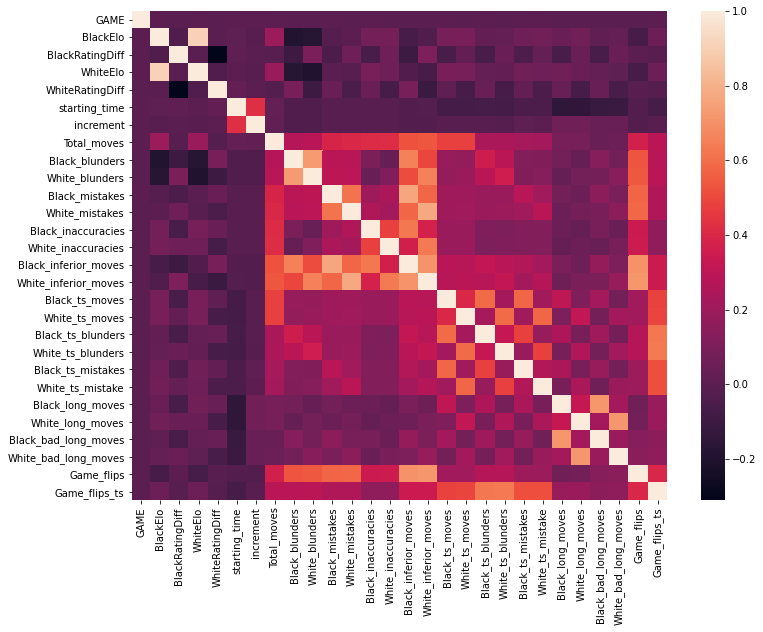

In [145]:
plt.figure(figsize = (12,9))
sns.heatmap(Correlation_Tab)
plt.savefig('CorrelationTable')

Create distribution plots for each variable. 

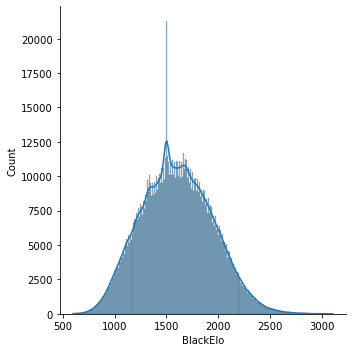

In [146]:
sns.displot(Chess.BlackElo, kde = True)
plt.savefig('BlackElo')

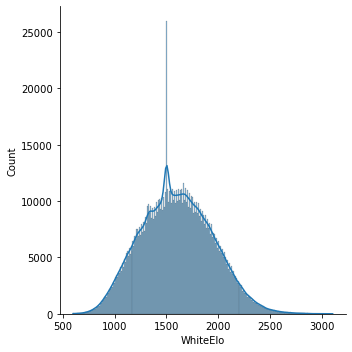

In [147]:
sns.displot(Chess.WhiteElo, kde = True)
plt.savefig('WhiteElo')

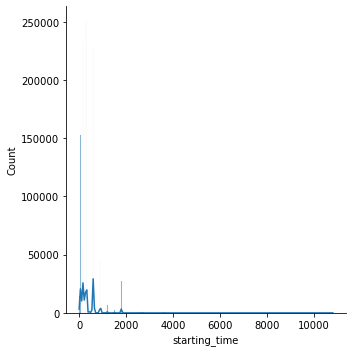

In [148]:
sns.displot(Chess.starting_time, kde = True)
plt.savefig('starting_time')

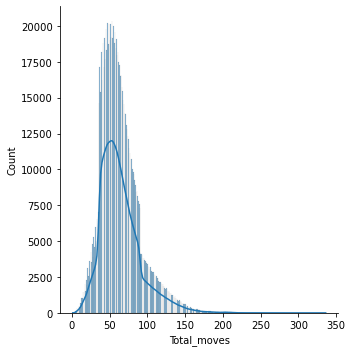

In [149]:
sns.displot(Chess.Total_moves, kde = True)
plt.savefig('Total_moves')

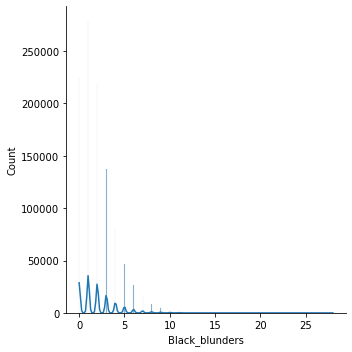

In [150]:
sns.displot(Chess.Black_blunders, kde = True)
plt.savefig('Black_blunders')

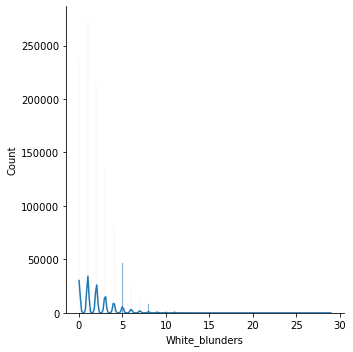

In [151]:
sns.displot(Chess.White_blunders, kde = True)
plt.savefig('White_blunders')

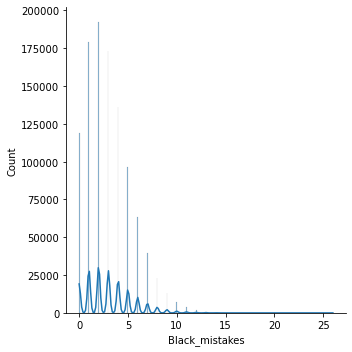

In [152]:
sns.displot(Chess.Black_mistakes, kde = True)
plt.savefig('Black_mistakes')

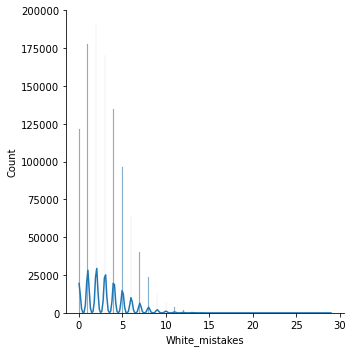

In [153]:
sns.displot(Chess.White_mistakes, kde = True)
plt.savefig('White_mistakes')

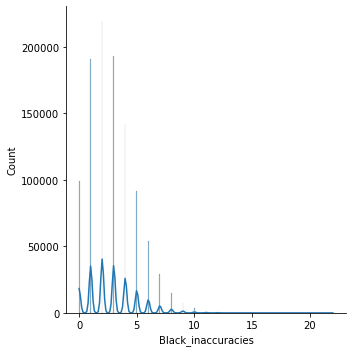

In [154]:
sns.displot(Chess.Black_inaccuracies, kde = True)
plt.savefig('Black_inaccuracies')

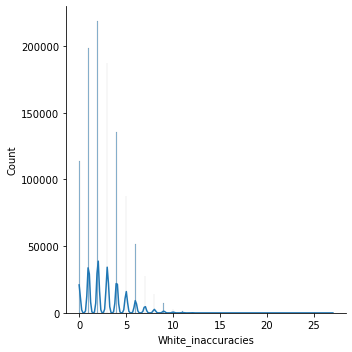

In [155]:
sns.displot(Chess.White_inaccuracies, kde = True)
plt.savefig('White_inaccuracies')

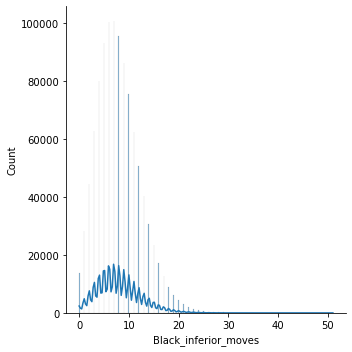

In [156]:
sns.displot(Chess.Black_inferior_moves, kde = True)
plt.savefig('Black_inferior_moves')

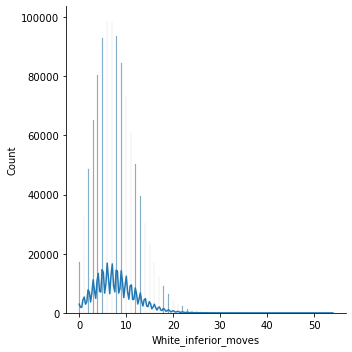

In [157]:
sns.displot(Chess.White_inferior_moves, kde = True)
plt.savefig('White_inferior_moves')

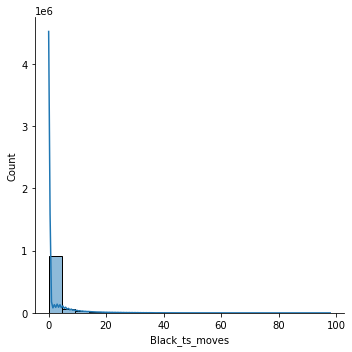

In [158]:
sns.displot(Chess.Black_ts_moves, kde = True)
plt.savefig('Black_ts_moves')

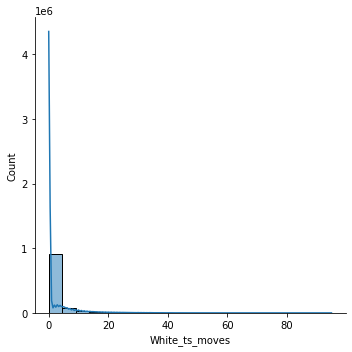

In [159]:
sns.displot(Chess.White_ts_moves, kde = True)
plt.savefig('White_ts_moves')

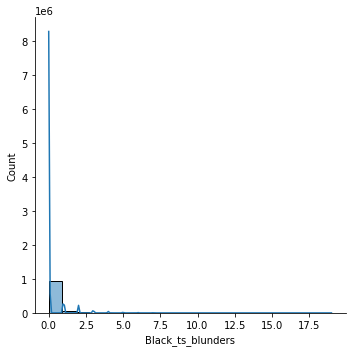

In [160]:
sns.displot(Chess.Black_ts_blunders, kde = True)
plt.savefig('Black_ts_blunders')

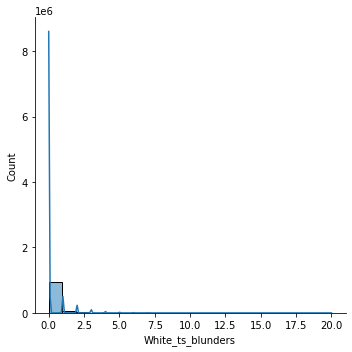

In [161]:
sns.displot(Chess.White_ts_blunders, kde = True)
plt.savefig('White_ts_blunders')

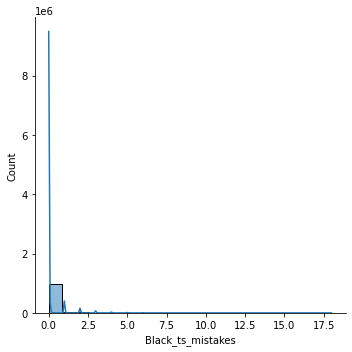

In [162]:
sns.displot(Chess.Black_ts_mistakes, kde = True)
plt.savefig('Black_ts_mistakes')

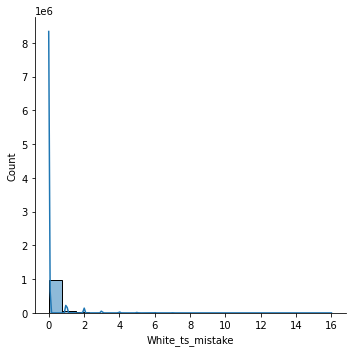

In [163]:
sns.displot(Chess.White_ts_mistake, kde = True)
plt.savefig('White_ts_mistake')

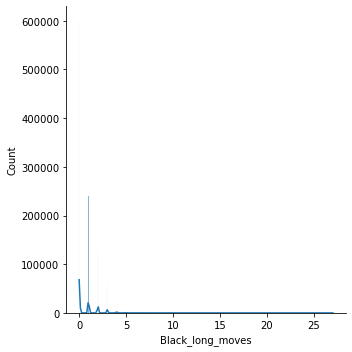

In [164]:
sns.displot(Chess.Black_long_moves, kde = True)
plt.savefig('Black_long_moves')

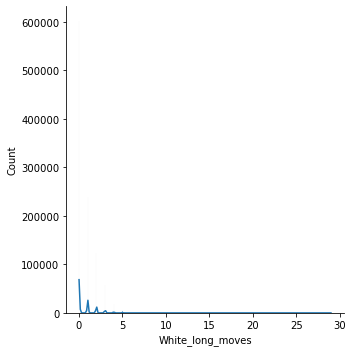

In [165]:
sns.displot(Chess.White_long_moves, kde = True)
plt.savefig('White_long_moves')

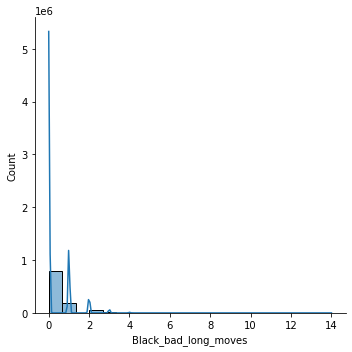

In [166]:
sns.displot(Chess.Black_bad_long_moves, kde = True)
plt.savefig('Black_bad_long_moves')

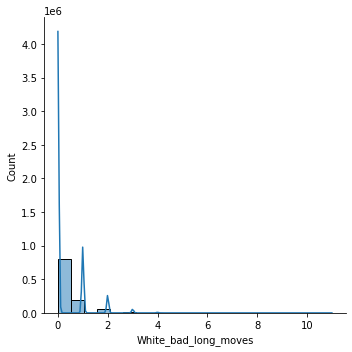

In [167]:
sns.displot(Chess.White_bad_long_moves, kde = True)
plt.savefig('White_bad_long_moves')

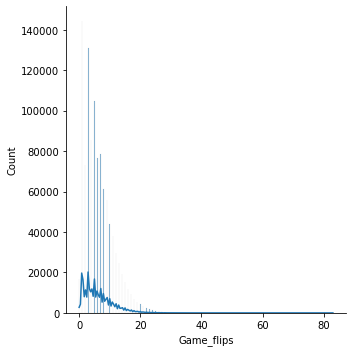

In [168]:
sns.displot(Chess.Game_flips, kde = True)
plt.savefig('Game_flips')

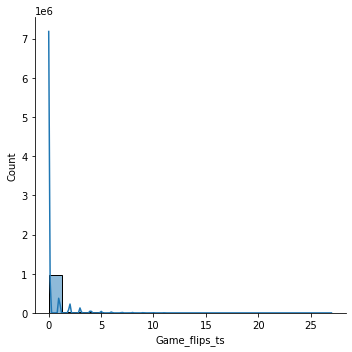

In [169]:
sns.displot(Chess.Game_flips_ts, kde = True)
plt.savefig('Game_flips_ts')

Create scatter plots for the dataset. 

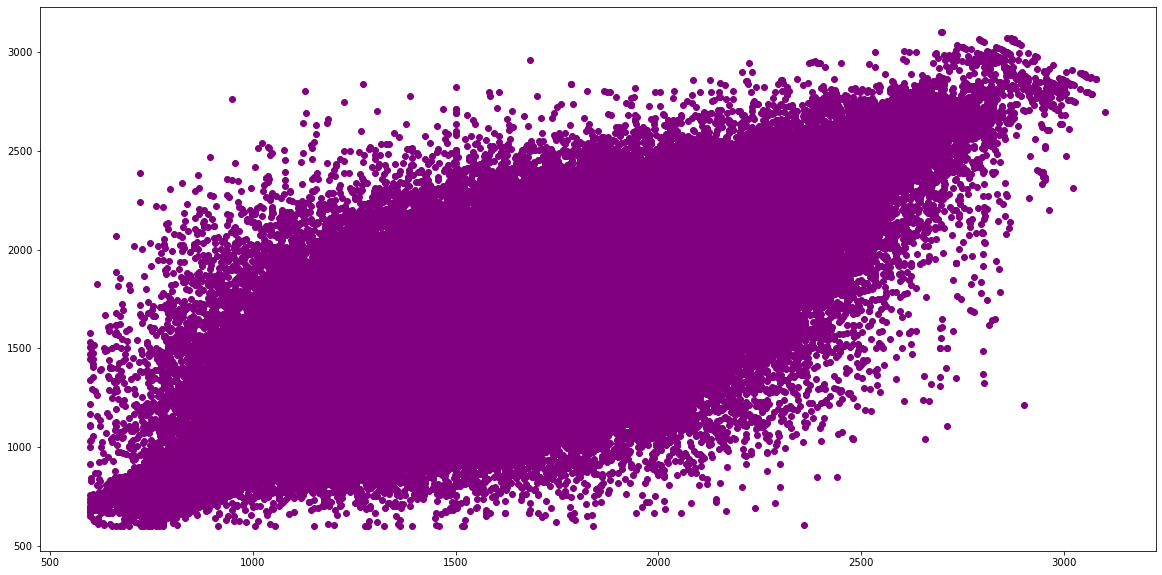

In [170]:
plt.figure(figsize = (20,10))
plt.scatter(Chess.WhiteElo, Chess.BlackElo, color = 'purple', marker = 'o')
plt.savefig('WhiteElo BlackElo Scatter')

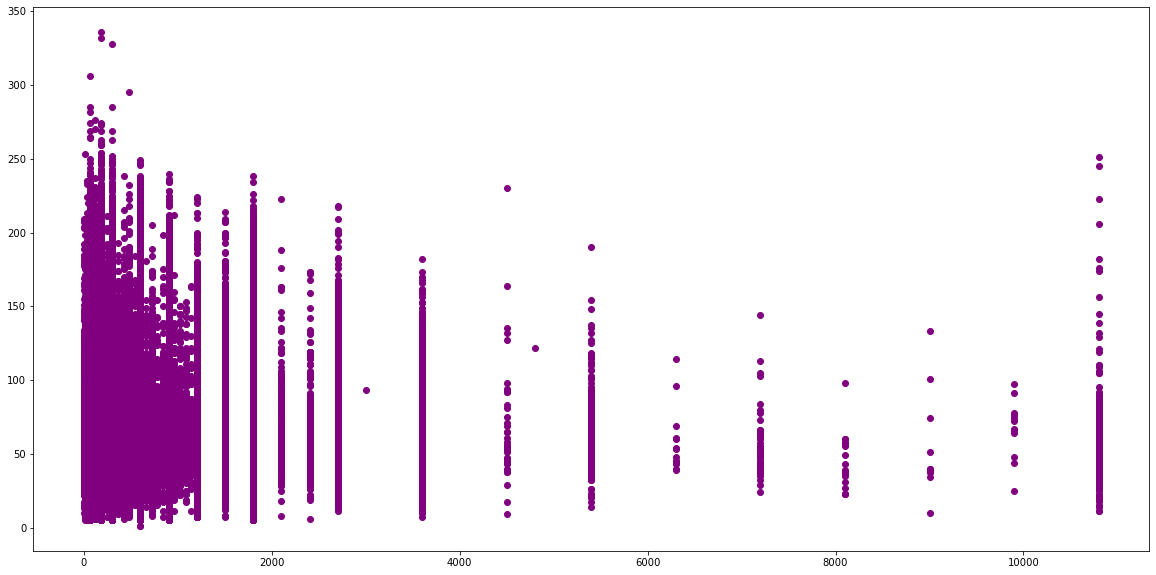

In [171]:
plt.figure(figsize = (20,10))
plt.scatter(Chess.starting_time, Chess.Total_moves, color = 'purple', marker = 'o')
plt.savefig('starting_time total_moves scatter')

Create bar graphs for each categorical variable. 

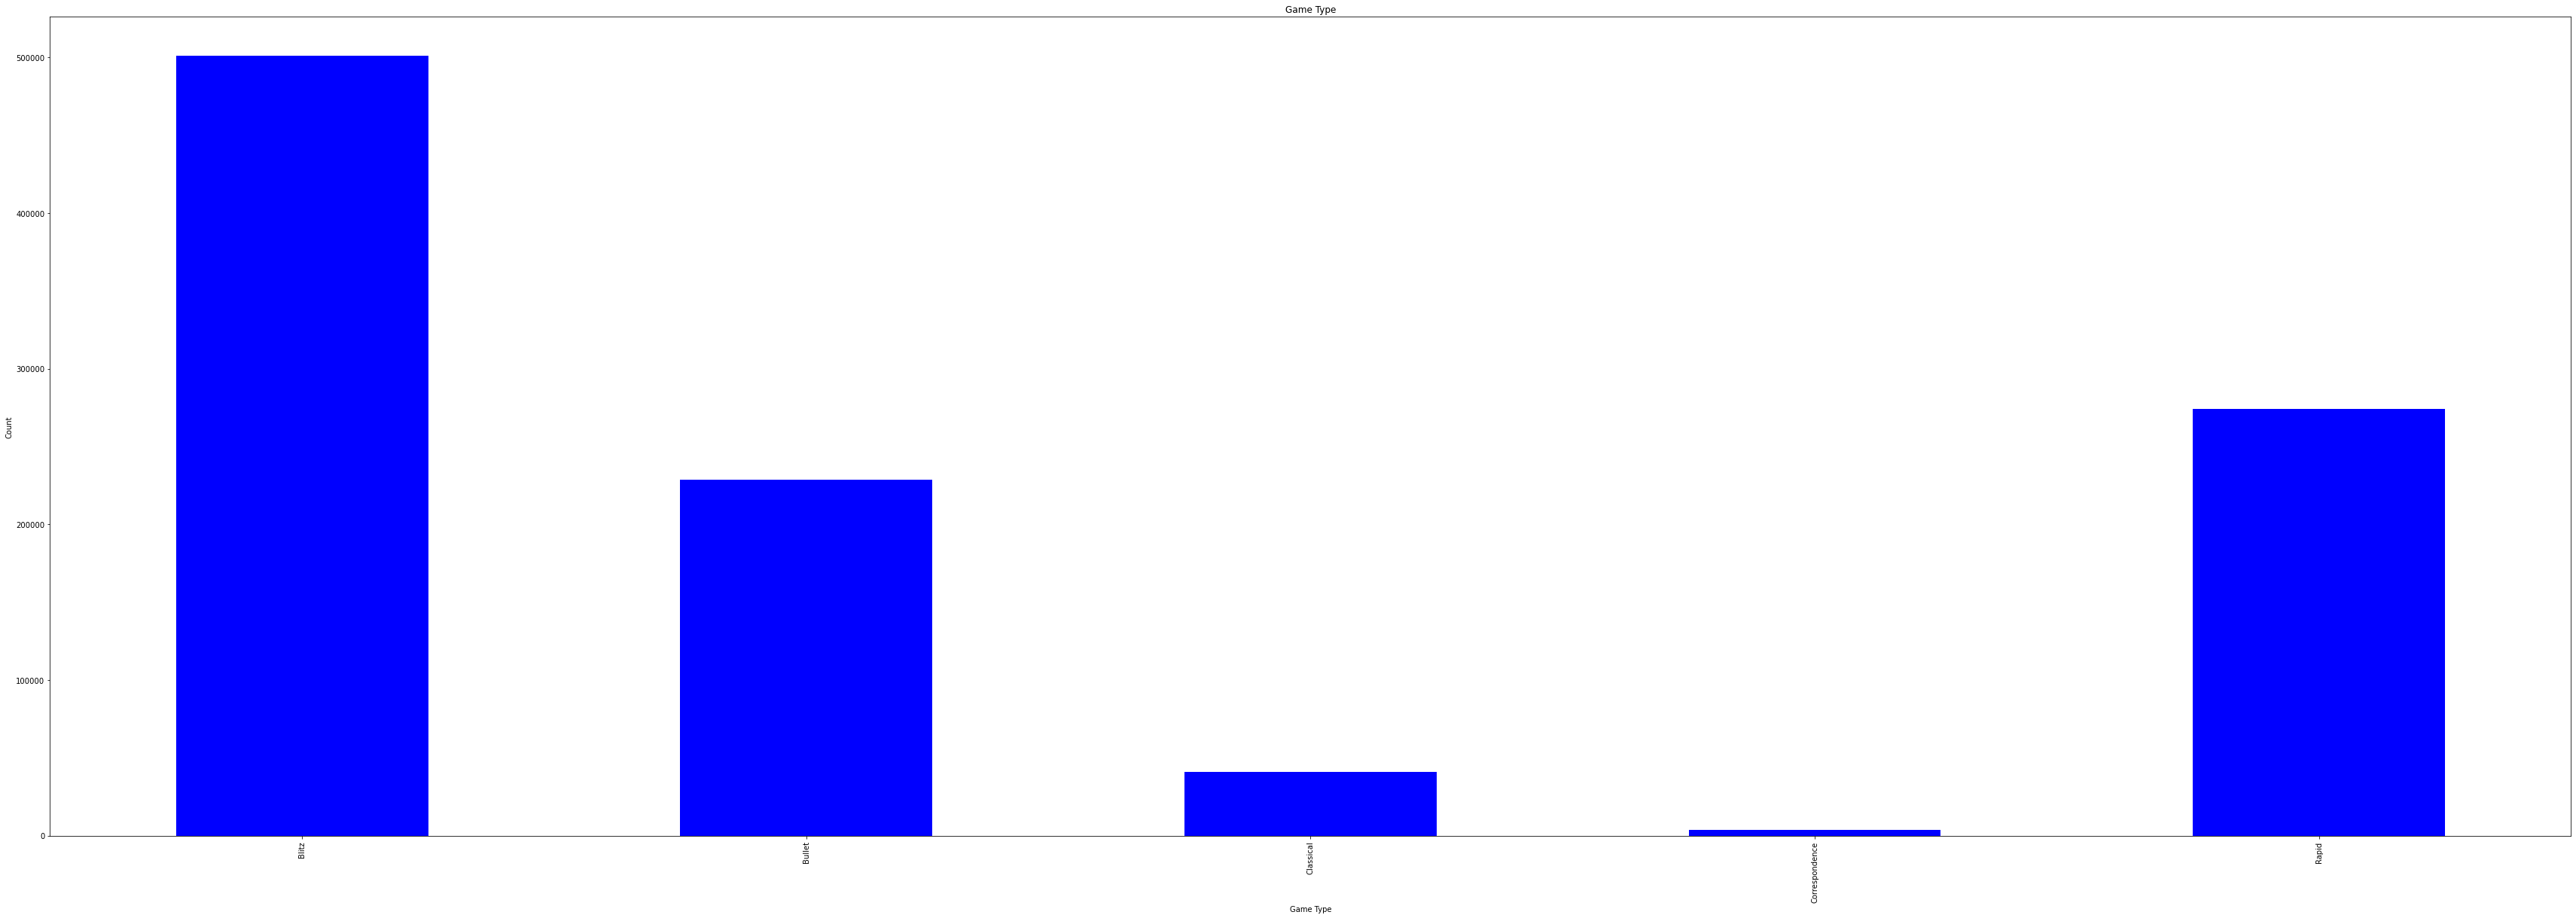

In [172]:
fig = plt.figure(figsize = (60,20))
Chess.Game_type.groupby(Chess.Game_type).count().plot(kind = 
                                                    'bar', title = 'Game Type', xlabel = 'Game Type',
                                                    ylabel = 'Count', color = 'blue')
plt.savefig('Game_type')

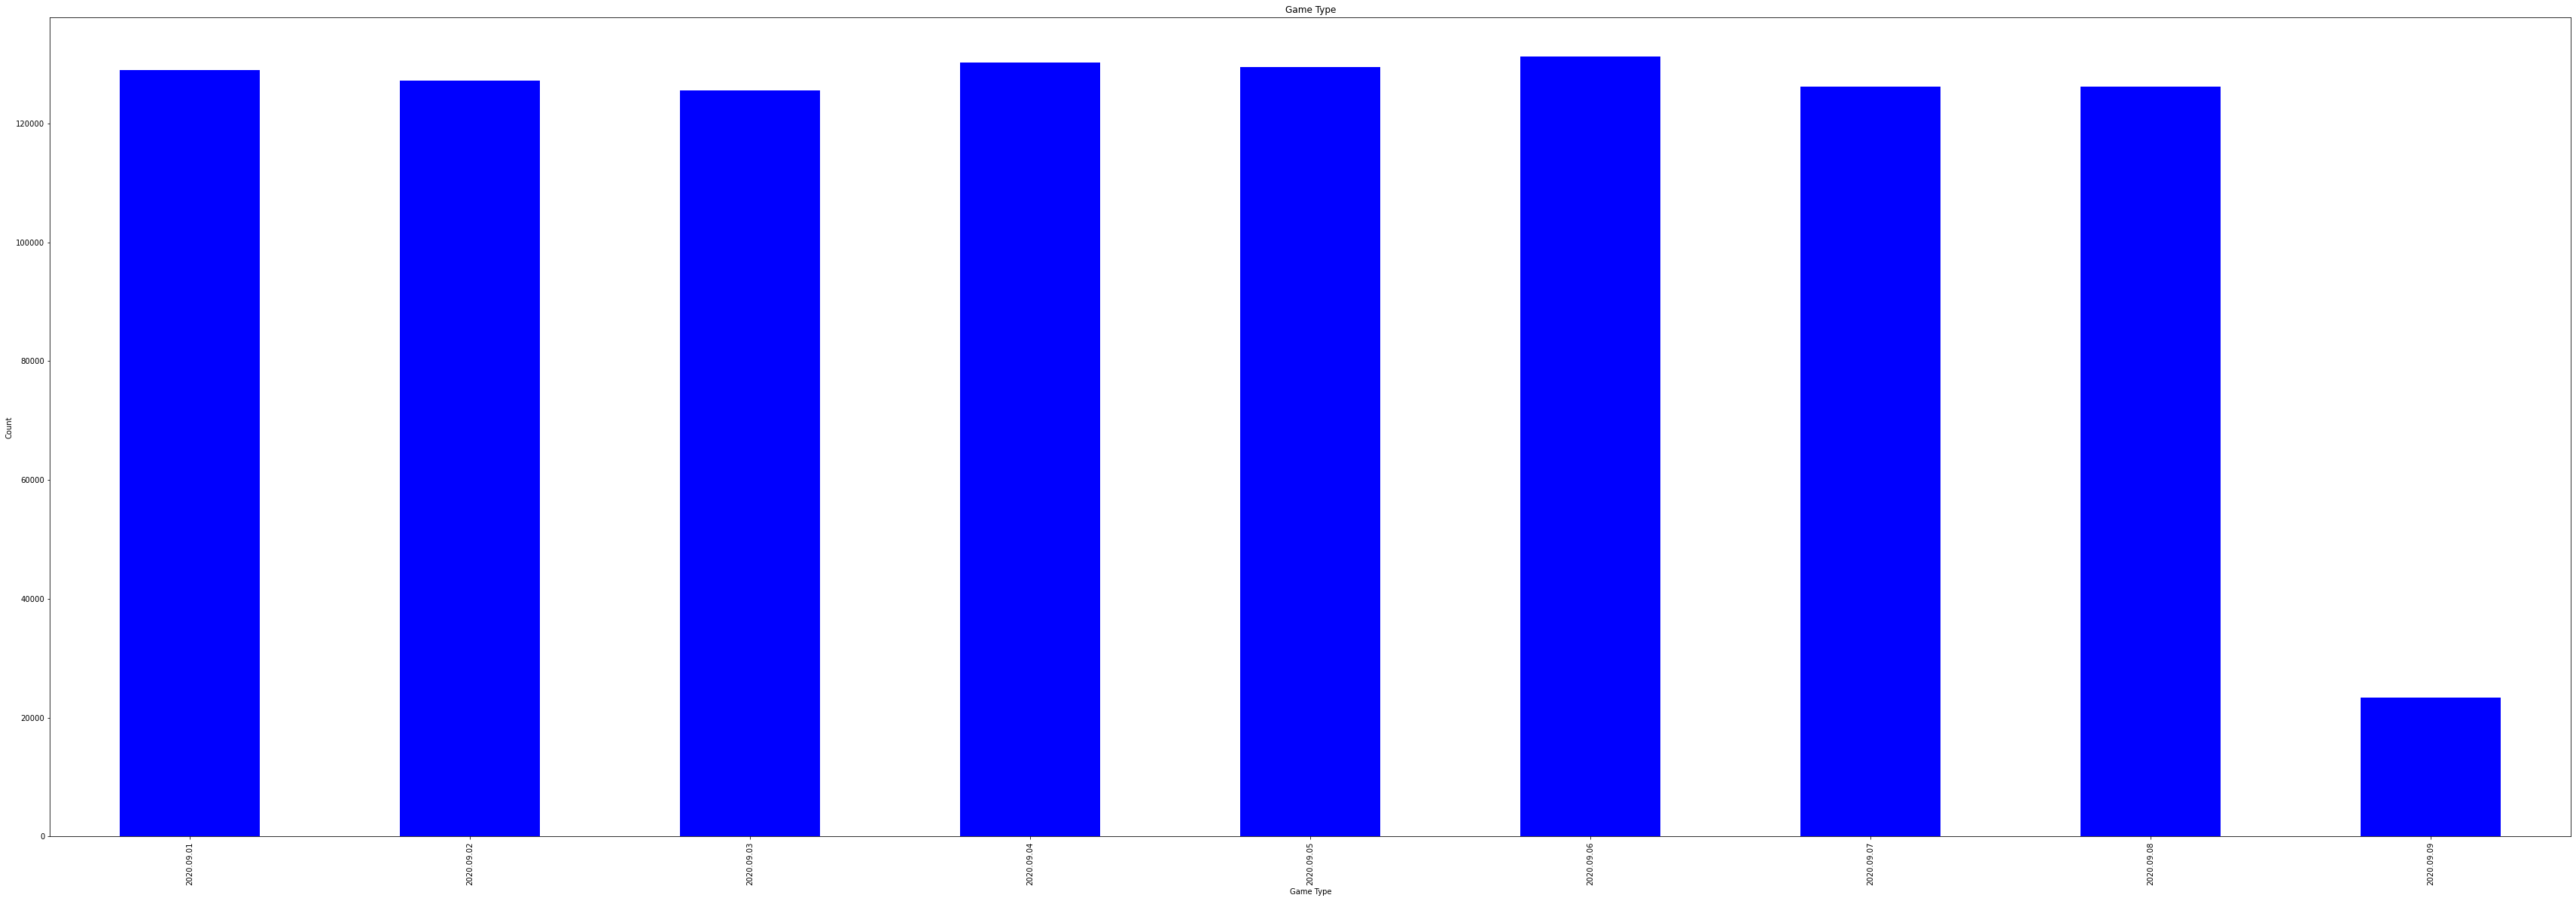

In [173]:
fig = plt.figure(figsize = (60,20))
Chess.Date.groupby(Chess.Date).count().plot(kind = 
                                                    'bar', title = 'Game Type', xlabel = 'Game Type',
                                                    ylabel = 'Count', color = 'blue')
plt.savefig('Date')

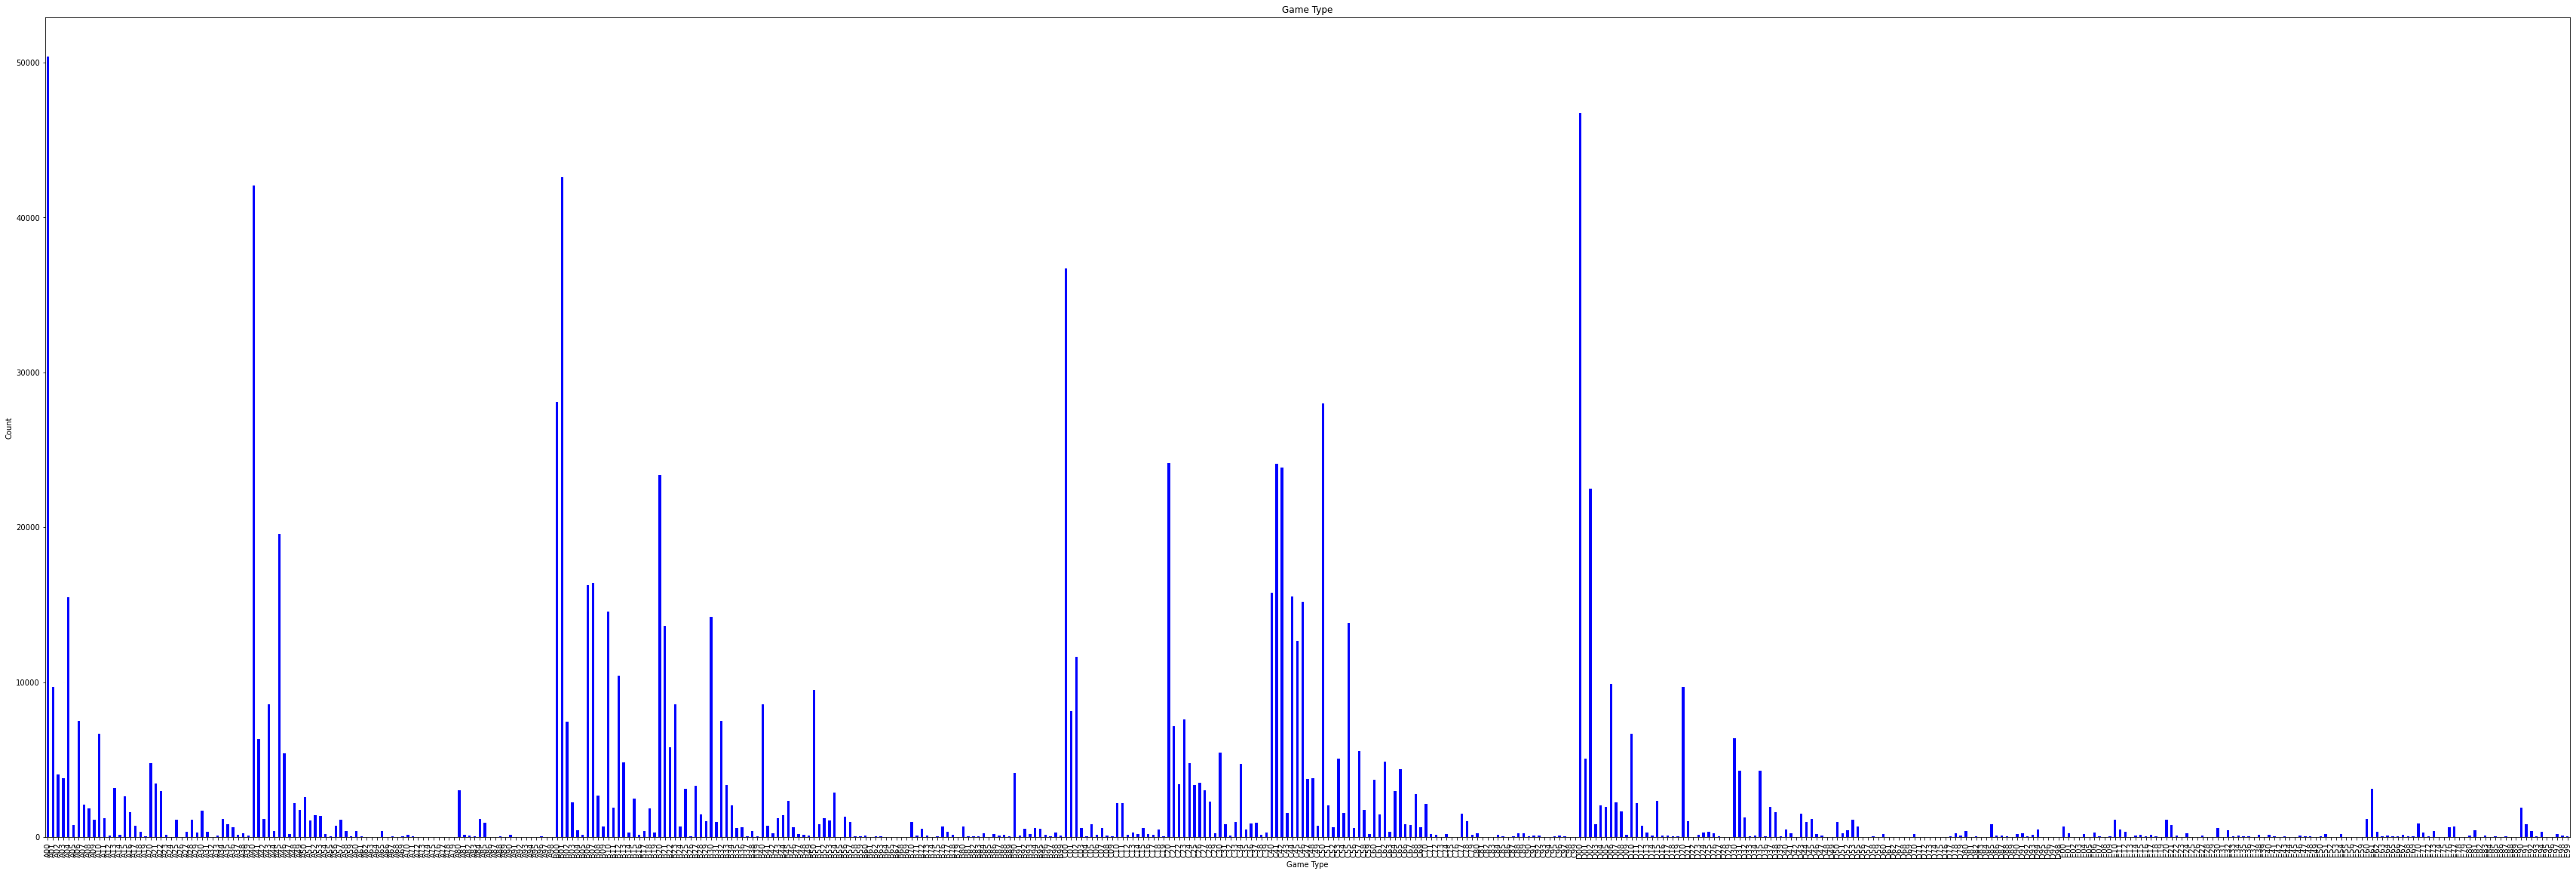

In [174]:
fig = plt.figure(figsize = (60,20))
Chess.ECO.groupby(Chess.ECO).count().plot(kind = 
                                                    'bar', title = 'Game Type', xlabel = 'Game Type',
                                                    ylabel = 'Count', color = 'blue')
plt.savefig('ECO')

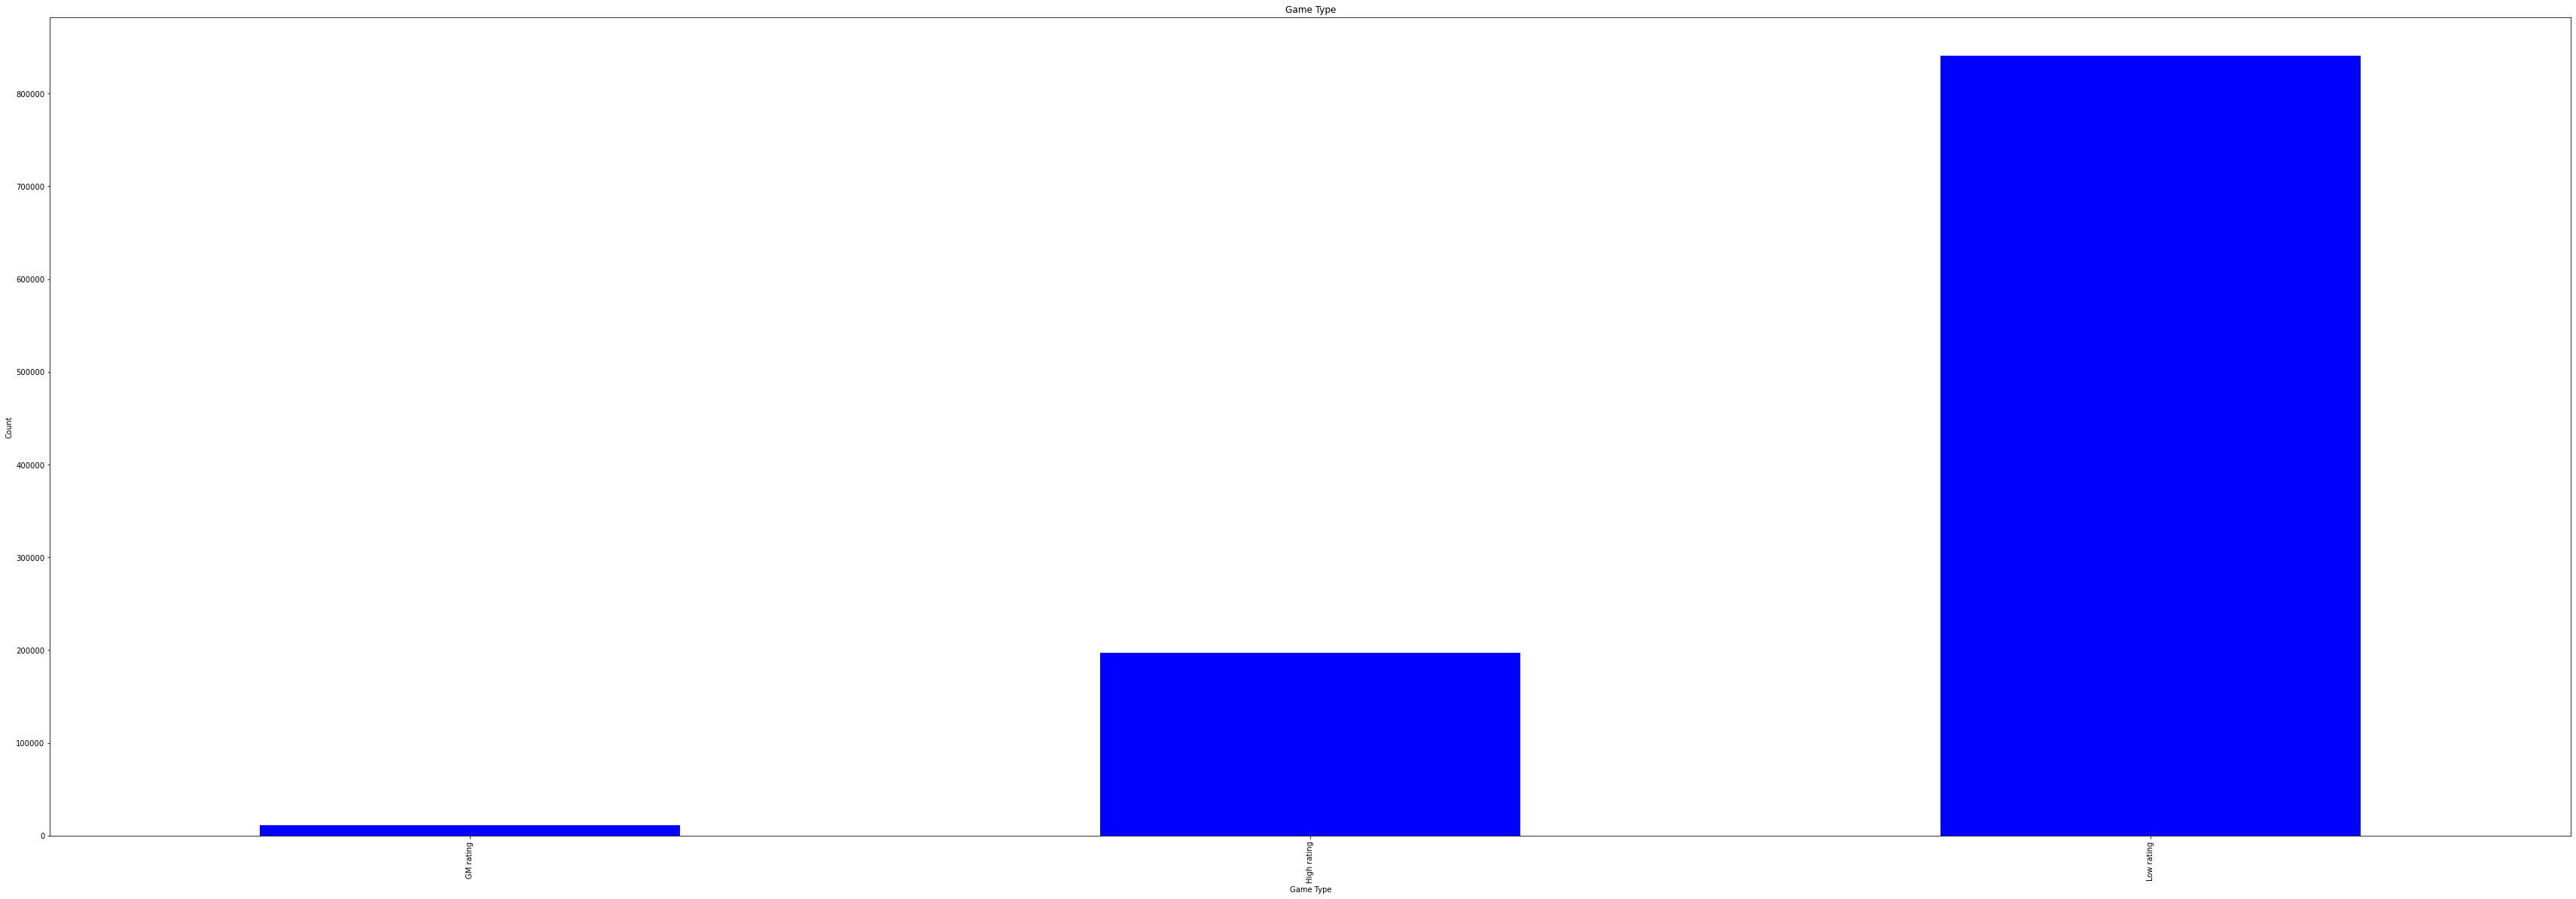

In [175]:
fig = plt.figure(figsize = (60,20))
Chess.White_elo_category.groupby(Chess.White_elo_category).count().plot(kind = 
                                                    'bar', title = 'Game Type', xlabel = 'Game Type',
                                                    ylabel = 'Count', color = 'blue')
plt.savefig('White_elo_category')

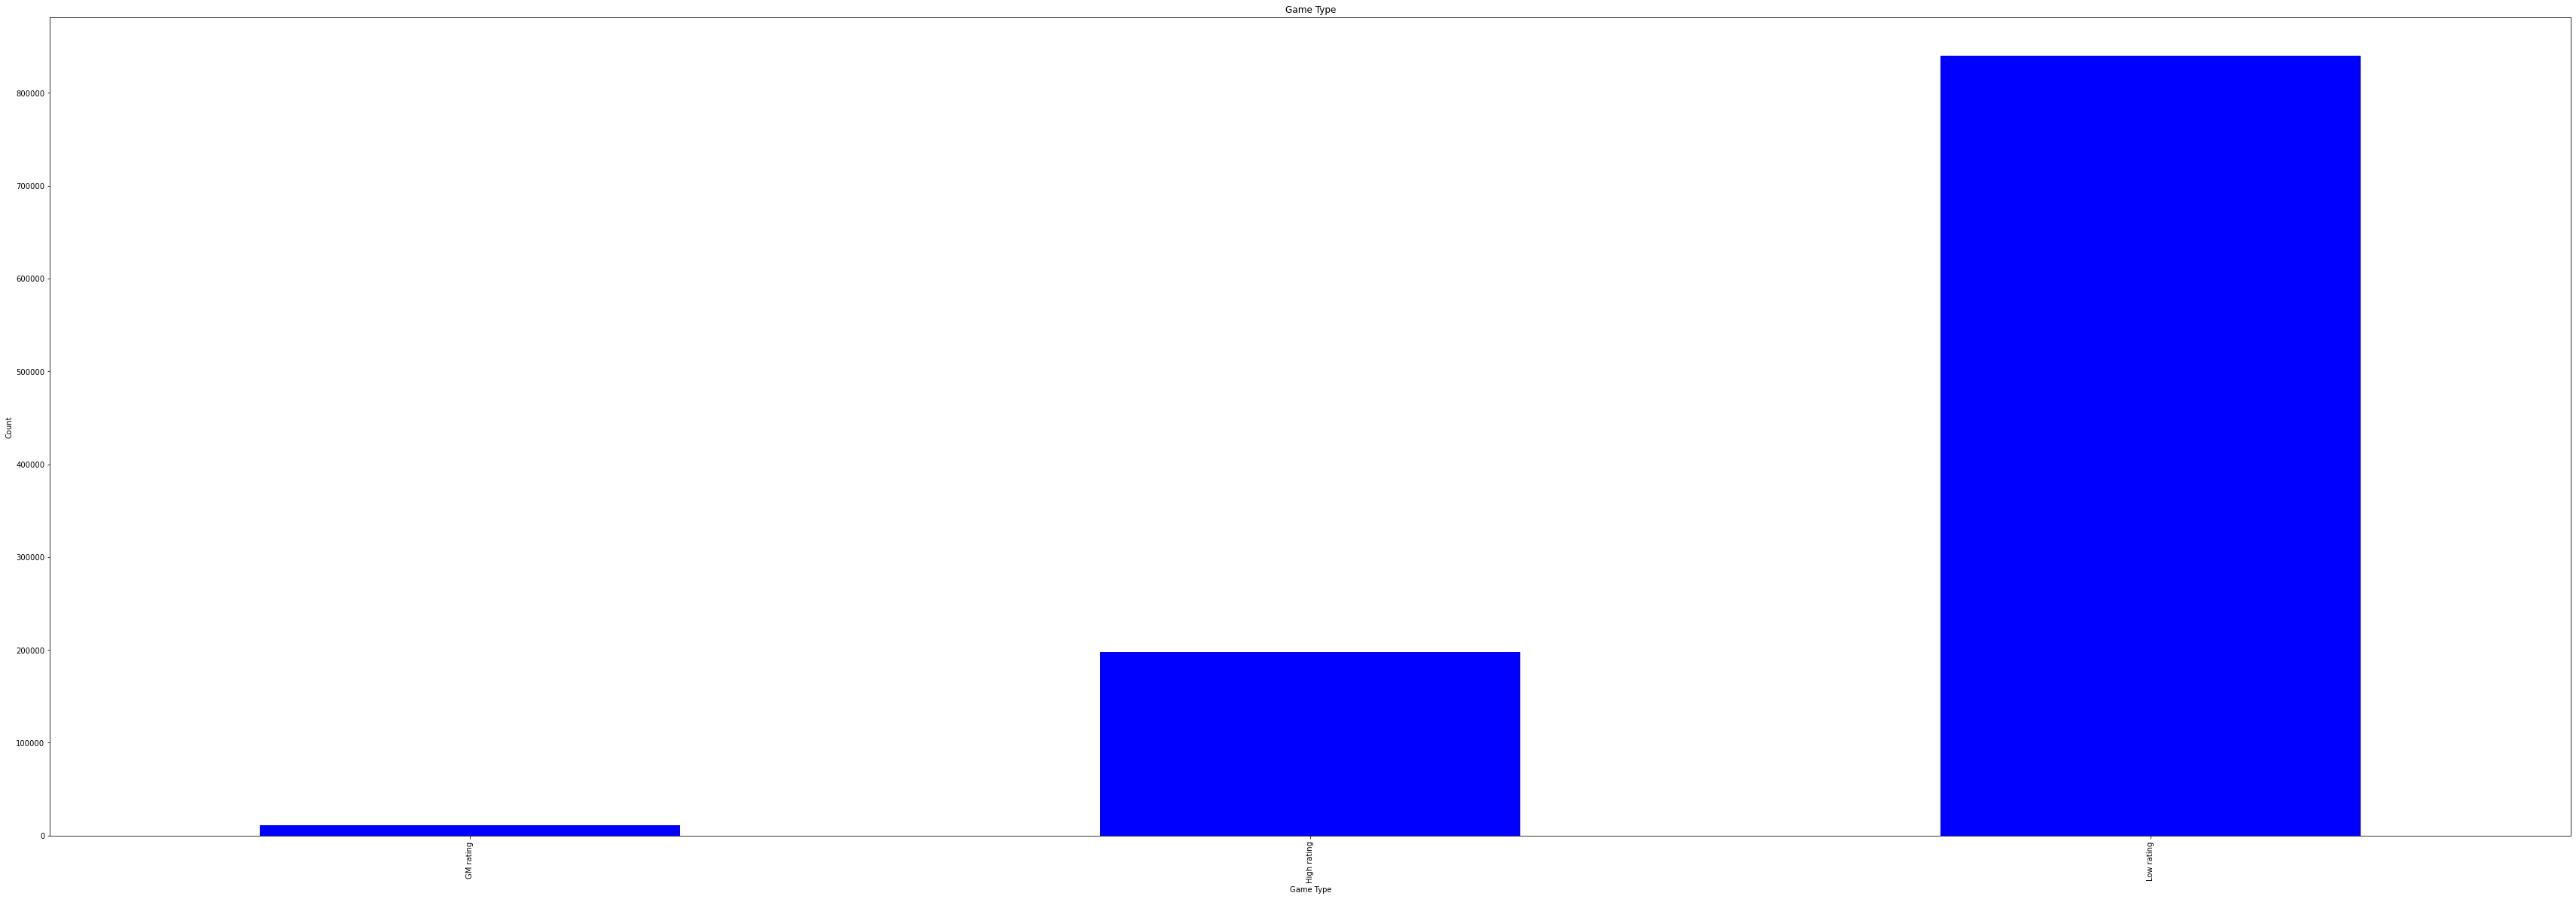

In [176]:
fig = plt.figure(figsize = (60,20))
Chess.Black_elo_category.groupby(Chess.Black_elo_category).count().plot(kind = 
                                                    'bar', title = 'Game Type', xlabel = 'Game Type',
                                                    ylabel = 'Count', color = 'blue')
plt.savefig('Black_elo_category')

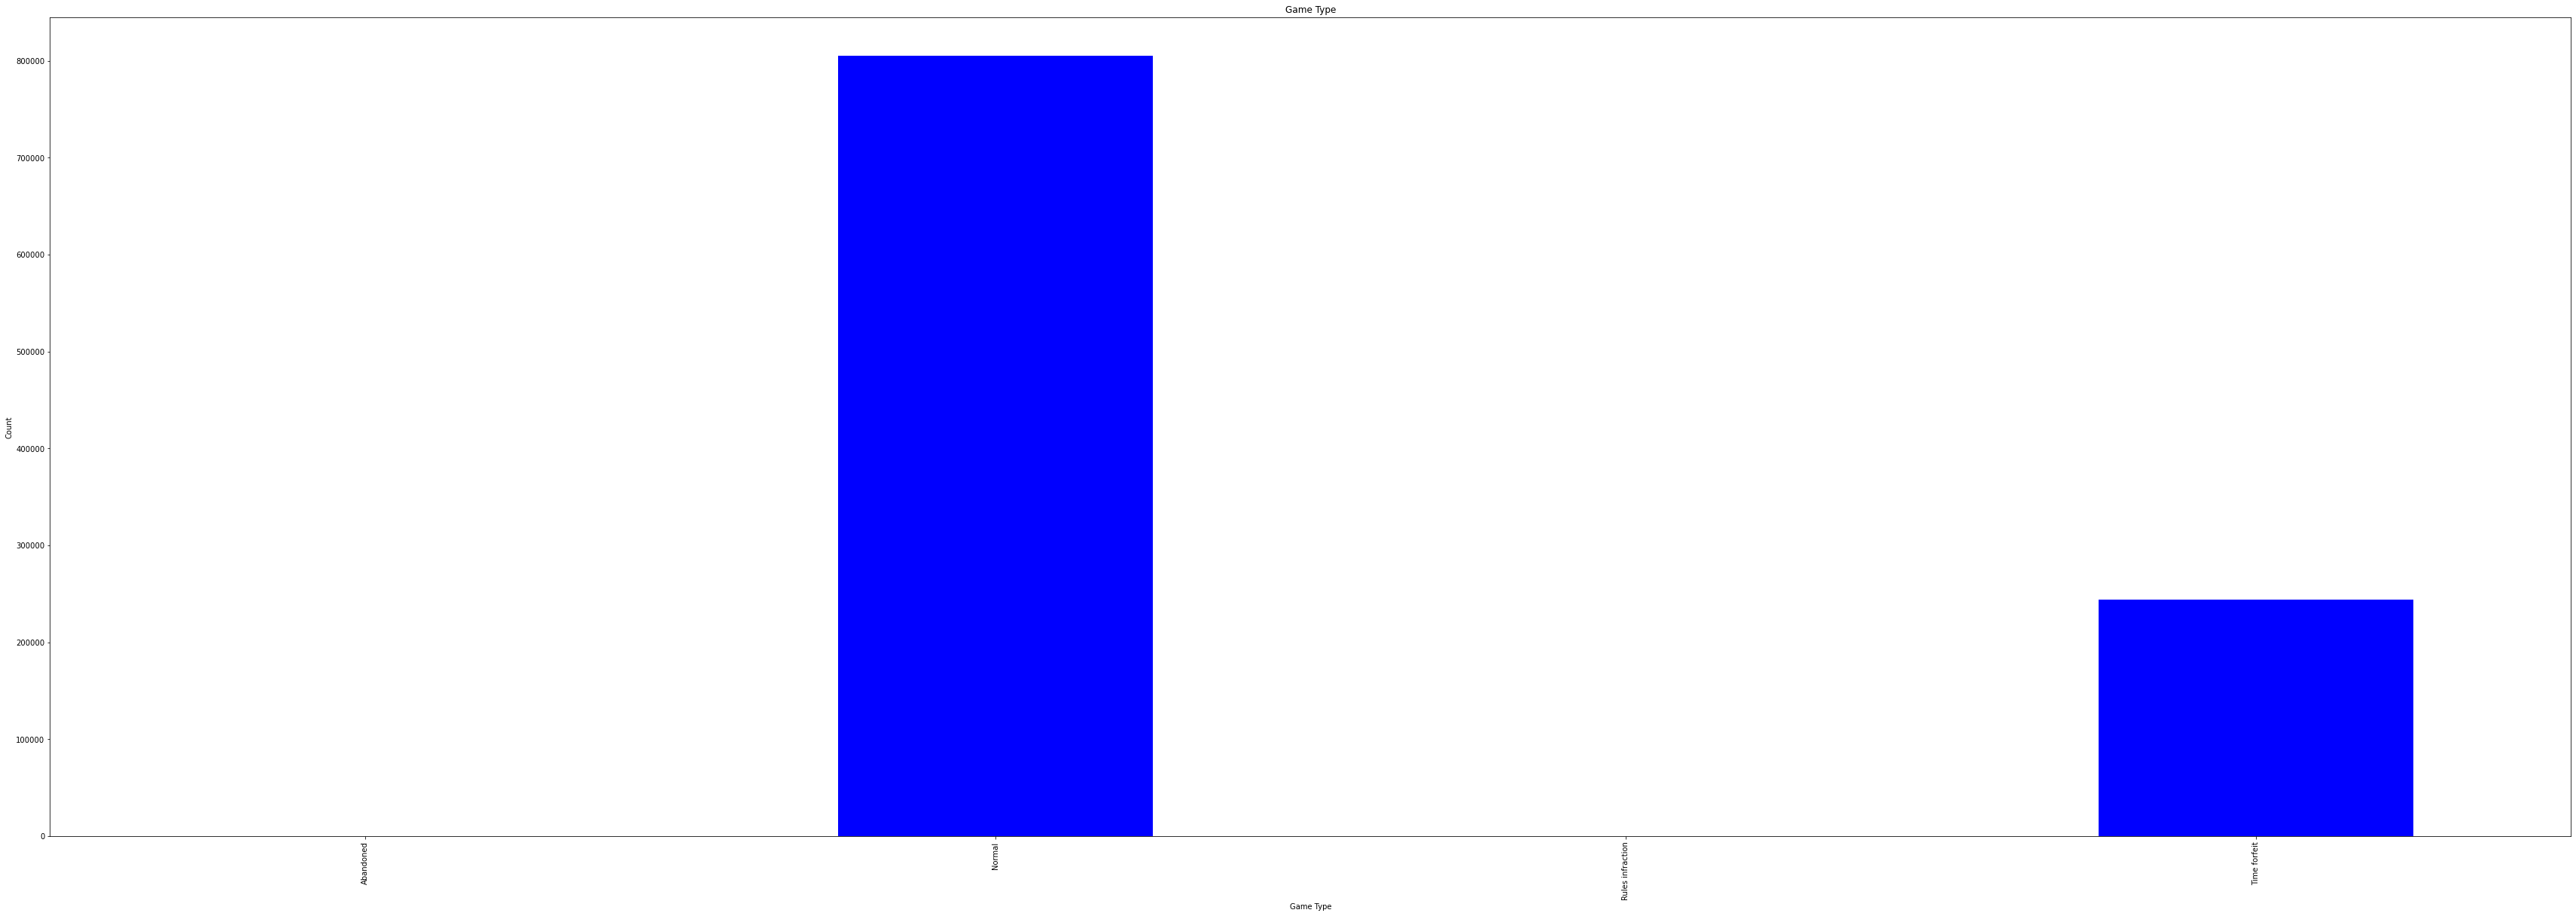

In [177]:
fig = plt.figure(figsize = (60,20))
Chess.Termination.groupby(Chess.Termination).count().plot(kind = 
                                                    'bar', title = 'Game Type', xlabel = 'Game Type',
                                                    ylabel = 'Count', color = 'blue')
plt.savefig('Termination')